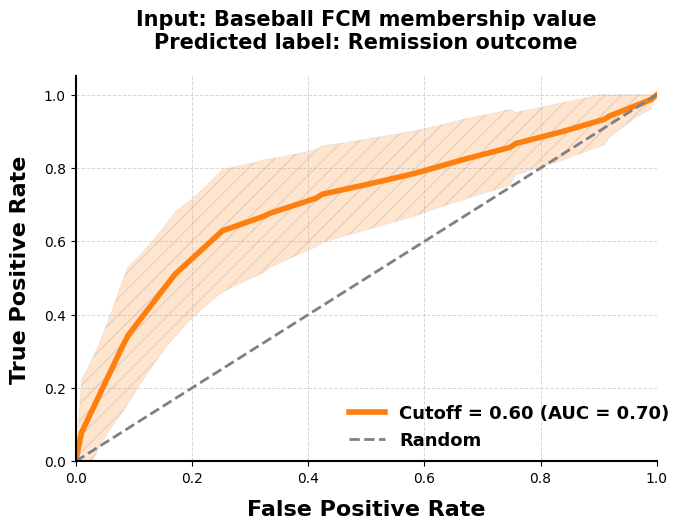

In [6]:
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np
from numpy import interp

# 仅加载 cutoff 0.70 的指标数据
with open('/Users/zhangtongyi/Desktop/P0022024-认知聚类-project(最新版）/A.最新版本/3.控制total PANSS Scores/3.聚类后分析-控制PANSStotal/FCM=0.60(主结果)/6.FCM隶属度预测RSAW预后结果-0.60-50次/metrics/hold_metrics_list.pkl', 'rb') as f:
    hold_metrics_list_070 = pickle.load(f)
    
# 模型信息（每个模型包含 10 个 epoch 数据）
model_info = [
    {"name": "SVM", "color": "#1f77b4"},       # blue
    {"name": "AdaBoost", "color": "#ff7f0e"},    # orange
    {"name": "RandomForest", "color": "#2ca02c"},# green
    {"name": "Stacking", "color": "#d62728"},    # red
]

partition_size = 50  # 每个模型包含的 epoch 数量

plt.figure(figsize=(7.5, 5))

# 指定选择 AdaBoost 模型（在 model_info 中索引为 1）
ada_idx = 1
model = model_info[ada_idx]
model_metrics = hold_metrics_list_070[ada_idx * partition_size : (ada_idx + 1) * partition_size]

# 计算 ROC 曲线
tprs = []
mean_tpr = np.zeros(100)
base_fpr = np.linspace(0, 1, 100)

for i in range(partition_size):
    y_test_holdout, y_pred_prob_holdout = model_metrics[i]
    fpr, tpr, _ = roc_curve(y_test_holdout, y_pred_prob_holdout)
    tpr = np.interp(base_fpr, fpr, tpr)
    tpr[0] = 0.0
    tprs.append(tpr)
    mean_tpr += tpr

mean_tpr /= partition_size
mean_tpr[-1] = 1.0
mean_auc = auc(base_fpr, mean_tpr)

# 构造 AdaBoost 模型的指标字典
selected_model = {
    "name": model["name"],
    "color": model["color"],
    "base_fpr": base_fpr,
    "mean_tpr": mean_tpr,
    "mean_auc": mean_auc,
    "std_tpr": np.std(tprs, axis=0)
}

# 绘制 cutoff 0.70 下 AdaBoost 模型的 ROC 曲线及置信区间
mean_tpr_070 = selected_model["mean_tpr"]
base_fpr_070 = selected_model["base_fpr"]
std_tpr_070 = selected_model["std_tpr"]

plt.plot(
    base_fpr_070,
    mean_tpr_070,
    color=selected_model["color"],
    linestyle='-',  # 实线
    label=f'Cutoff = 0.60 (AUC = {selected_model["mean_auc"]:.2f})',
    linewidth=4
)

tprs_upper_070 = np.minimum(mean_tpr_070 + std_tpr_070, 1)
tprs_lower_070 = np.maximum(mean_tpr_070 - std_tpr_070, 0)
plt.fill_between(
    base_fpr_070, 
    tprs_lower_070, 
    tprs_upper_070, 
    color=selected_model["color"], 
    alpha=0.2,         # 控制阴影透明度
    edgecolor='grey',  # 添加灰色边框
    linewidth=0.5,     # 边框线宽
    linestyle='--',    # 虚线边框
    hatch='//'        # 斜线图案
)

plt.plot([0, 1], [0, 1], linestyle="--", color="grey", lw=2, label="Random")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate", fontsize=16, labelpad=10, color="black", fontweight="bold")
plt.ylabel("True Positive Rate", fontsize=16, labelpad=10, color="black", fontweight="bold")
plt.title("Input: Baseball FCM membership value\nPredicted label: Remission outcome", fontsize=15, pad=20, color="black", fontweight="bold")
plt.legend(
    loc="lower right",
    frameon=False,
    prop={'weight': 'bold', 'size': 13},
    bbox_to_anchor=(1.05, -0.01),
    ncol=1
)
plt.grid(True, linestyle='--', linewidth=0.7, alpha=0.5)

# 自定义坐标轴样式
ax = plt.gca()
ax.spines['left'].set_color('black')
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_color('black') 
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# 保存图片
plt.savefig("image/best_roc_curves_combined.jpg", dpi=1200, bbox_inches='tight', transparent=True)
plt.show()

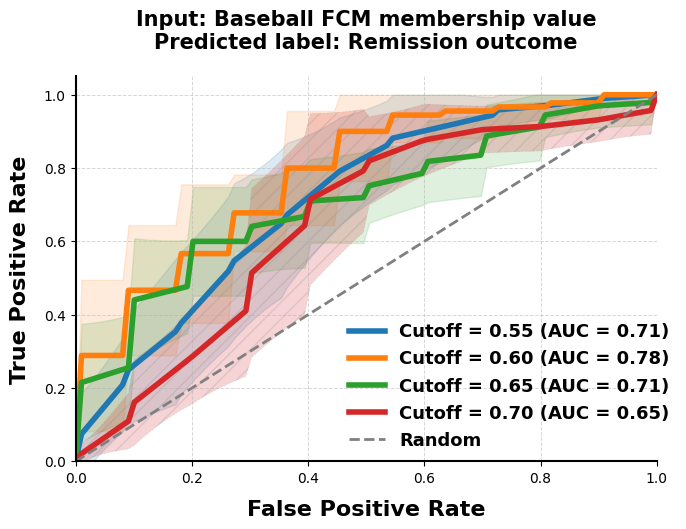

In [3]:
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np
from numpy import interp


# Load the metrics and model data for cutoff 0.55
with open('/Users/zhangtongyi/Desktop/我论文的数据文档/P0032024-认知聚类-project(最新版）/1.当前最新版本 /4.基线数据分析-想要得到理想结果/3.聚类后分析/FCM=0.55/6.FCM隶属度预测RSAW预后结果-0.55/metrics/hold_metrics_list.pkl', 'rb') as f:
    hold_metrics_list_055 = pickle.load(f)

# Load the metrics and model data for cutoff 0.60
with open('/Users/zhangtongyi/Desktop/我论文的数据文档/P0032024-认知聚类-project(最新版）/1.当前最新版本 /4.基线数据分析-想要得到理想结果/3.聚类后分析/FCM=0.60(主结果)/6.FCM隶属度预测RSAW预后结果-0.60/metrics/hold_metrics_list.pkl', 'rb') as f:
    hold_metrics_list_060 = pickle.load(f)

# Load the metrics and model data for cutoff 0.65
with open('/Users/zhangtongyi/Desktop/我论文的数据文档/P0032024-认知聚类-project(最新版）/1.当前最新版本 /4.基线数据分析-想要得到理想结果/3.聚类后分析/FCM=0.65/6.FCM隶属度预测RSAW预后结果-0.65/metrics/hold_metrics_list.pkl', 'rb') as f:
    hold_metrics_list_065 = pickle.load(f)

# Load the metrics and model data for cutoff 0.70
with open('/Users/zhangtongyi/Desktop/我论文的数据文档/P0032024-认知聚类-project(最新版）/1.当前最新版本 /4.基线数据分析-想要得到理想结果/3.聚类后分析/FCM=0.70/3.FCM隶属度预测RSAW预后0.70 模糊阈值/metrics/hold_metrics_list.pkl', 'rb') as f:
    hold_metrics_list_070 = pickle.load(f)
    
    
model_info = [
    {"name": "SVM", "color": "#1f77b4"},  # blue
    {"name": "AdaBoost", "color": "#ff7f0e"},  # orange
    {"name": "RandomForest", "color": "#2ca02c"},  # green
    {"name": "Stacking", "color": "#d62728"},  # red
]

partition_size = 10  # Number of epochs for each model

plt.figure(figsize=(7.5, 5))

# Cutoffs 0.55, 0.60, 0.65
for cutoff, hold_metrics_list, color in zip([0.55, 0.60, 0.65], [hold_metrics_list_055, hold_metrics_list_060, hold_metrics_list_065], ['#1f77b4', '#ff7f0e', '#2ca02c']):
    best_model = None
    best_auc = 0

    for model_idx, model in enumerate(model_info):
        start_idx = model_idx * partition_size
        end_idx = (model_idx + 1) * partition_size
        model_metrics = hold_metrics_list[start_idx:end_idx]

        tprs = []
        mean_tpr = np.zeros(100)
        base_fpr = np.linspace(0, 1, 100)

        for i in range(partition_size):
            y_test_holdout, y_pred_prob_holdout = model_metrics[i]
            fpr, tpr, _ = roc_curve(y_test_holdout, y_pred_prob_holdout)
            tpr = np.interp(base_fpr, fpr, tpr)
            tpr[0] = 0.0
            tprs.append(tpr)
            mean_tpr += tpr

        mean_tpr /= partition_size
        mean_tpr[-1] = 1.0
        mean_auc = auc(base_fpr, mean_tpr)

        if mean_auc > best_auc:  # Identify the best model based on AUC
            best_auc = mean_auc
            best_model = {
                "name": model["name"],
                "color": color,
                "base_fpr": base_fpr,
                "mean_tpr": mean_tpr,
                "mean_auc": mean_auc,
                "std_tpr": np.std(tprs, axis=0)
            }

    mean_tpr = best_model["mean_tpr"]
    base_fpr = best_model["base_fpr"]
    std_tpr = best_model["std_tpr"]

    plt.plot(
        base_fpr,
        mean_tpr,
        color=best_model["color"],
        linestyle='-',  # Solid line for the best model
        label=f'Cutoff = {cutoff:.2f} (AUC = {best_model["mean_auc"]:.2f})',
        linewidth=4
    )
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    plt.fill_between(base_fpr, tprs_lower, tprs_upper, color=best_model["color"], alpha=0.15)

# Adding Cutoff 0.70
best_model_070 = None
best_auc_070 = 0

for model_idx, model in enumerate(model_info):
    start_idx = model_idx * partition_size
    end_idx = (model_idx + 1) * partition_size
    model_metrics = hold_metrics_list_070[start_idx:end_idx]

    tprs = []
    mean_tpr = np.zeros(100)
    base_fpr = np.linspace(0, 1, 100)

    for i in range(partition_size):
        y_test_holdout, y_pred_prob_holdout = model_metrics[i]
        fpr, tpr, _ = roc_curve(y_test_holdout, y_pred_prob_holdout)
        tpr = np.interp(base_fpr, fpr, tpr)
        tpr[0] = 0.0
        tprs.append(tpr)
        mean_tpr += tpr

    mean_tpr /= partition_size
    mean_tpr[-1] = 1.0
    mean_auc = auc(base_fpr, mean_tpr)

    if mean_auc > best_auc_070:  # Identify the best model based on AUC for 0.70
        best_auc_070 = mean_auc
        best_model_070 = {
            "name": model["name"],
            "color": '#d62728',  # red for 0.70
            "base_fpr": base_fpr,
            "mean_tpr": mean_tpr,
            "mean_auc": mean_auc,
            "std_tpr": np.std(tprs, axis=0)
        }

# Plotting for cutoff 0.70
mean_tpr_070 = best_model_070["mean_tpr"]
base_fpr_070 = best_model_070["base_fpr"]
std_tpr_070 = best_model_070["std_tpr"]

plt.plot(
    base_fpr_070,
    mean_tpr_070,
    color=best_model_070["color"],
    linestyle='-',  # Solid line for the best model
    label=f'Cutoff = 0.70 (AUC = {best_model_070["mean_auc"]:.2f})',
    linewidth=4
)

tprs_upper_070 = np.minimum(mean_tpr_070 + std_tpr_070, 1)
tprs_lower_070 = np.maximum(mean_tpr_070 - std_tpr_070, 0)
# 绘制置信区间阴影,并调整外观
plt.fill_between(
    base_fpr_070, 
    tprs_lower_070, 
    tprs_upper_070, 
    color=best_model_070["color"], 
    alpha=0.2,  # 控制透明度
    edgecolor='grey',  # 添加灰色边框
    linewidth=0.5,  # 设置边框的线宽
    linestyle='--',  # 边框为虚线
    hatch='//'  # 添加斜线图案
)

# Plot settings
plt.plot([0, 1], [0, 1], linestyle="--", color="grey", lw=2, label="Random")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate", fontsize=16, labelpad=10, color="black", fontweight="bold")
plt.ylabel("True Positive Rate", fontsize=16, labelpad=10, color="black", fontweight="bold")
plt.title("Input: Baseball FCM membership value\nPredicted label: Remission outcome", fontsize=15, pad=20, color="black", fontweight="bold")
plt.legend(
    loc="lower right",
    frameon=False,
    prop={'weight': 'bold', 'size': 13},
    bbox_to_anchor=(1.05, -0.01),
    ncol=1
)
plt.grid(True, linestyle='--', linewidth=0.7, alpha=0.5)

# Customizing axes lines
ax = plt.gca()
ax.spines['left'].set_color('black')
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_color('black') 
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Save the plot
plt.savefig("image/best_roc_curves_combined.jpg", dpi=1200, bbox_inches='tight', transparent=True)
plt.show()